# **Exploratory Data Analysis**

## 1. **Problem definition**

Demonstrate the infrastructure and framework for each step of time series and supervised regression-based modeling for stock price prediction.

We need to understand what affects Microsoft stock price and hence incorporate as much information into the model.

### 1.1 **Predicted variable**

#### - *Weekly return of Microsoft Stock (MSFT)*

### 1.2 **Indepedent variables**

#### - *Stocks ( Historical Data MSFT, IBM , GOOGL)*

#### - *Currencies Exchange Rates ( USD/JPY , GBP/USD )*

#### - *Indices ( SP500 , DJIA, VIX )*


### 1.3 **Dataset**

#### - Yahoo Finance 
#### - Federal Reserve Economic Data (FRED) 
#### - Daily closing price for 2011 - 2021

## 2. **Getting started -- Loading Python Packages and Data**

In [26]:
import numpy as np
import pandas as pd
pd.set_option('precision', 3)

from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

import os
import sys
sys.path.append('/Users/damienmellot/desktop/MLE/Projects/fml/stock-price-prediction/')
import src.settings.base as stg
from src.infrastructure.datasetcreation import DataFrameBuilder

In [28]:
dfb = DataFrameBuilder('MSFT_R21_data.csv')
df = dfb.data
X = dfb.features
Y = dfb.target
df

MSFT_pred  MSFT_pred(t-1)  GOOGL(t-1)  IBM(t-1)  DEXJPUS(t-1)  \
Date                                                                        
2011-03-16  2.510e-02           0.009      -0.092    -0.030    -3.046e-02   
2011-03-17  2.353e-02           0.025      -0.120    -0.065    -4.416e-02   
2011-03-18  1.123e-02           0.024      -0.106    -0.055    -6.145e-02   
2011-03-21 -7.132e-03           0.011      -0.107    -0.047    -2.567e-02   
2011-03-23 -7.836e-04          -0.007      -0.081    -0.041    -2.568e-02   
...               ...             ...         ...       ...           ...   
2021-01-07  1.051e-01           0.132      -0.057     0.016    -8.583e-03   
2021-01-08  1.043e-01           0.105      -0.024     0.034    -4.228e-03   
2021-01-11  1.102e-01           0.104      -0.007     0.022    -3.939e-03   
2021-01-12  1.289e-01           0.110      -0.012     0.014     2.692e-03   
2021-01-13  1.244e-01           0.129      -0.017     0.033     2.883e-04   

            DEXUSUK(t-1)  SP500(t-1)  DJIA(t-1)  VIXCLS(t-1)  MSFT_1M(t-1)  \
Date                                                                         
2011-03-16     2.556e-03      -0.039     -0.034        0.422         0.074   
2011-03-17    -6.220e-03      -0.055     -0.051        0.586         0.113   
2011-03-18     4.968e-03      -0.048     -0.043        0.456         0.108   
2011-03-21     9.271e-04      -0.047     -0.038        0.387         0.097   
2011-03-23     1.906e-03      -0.034     -0.029        0.227         0.064   
...                  ...         ...        ...          ...           ...   
2021-01-07     1.744e-02       0.012      0.021        0.193         0.142   
2021-01-08     1.180e-02       0.035      0.032        0.004         0.087   
2021-01-11     2.158e-02       0.042      0.036       -0.044         0.088   
2021-01-12     2.433e-02       0.036      0.032        0.032         0.084   
2021-01-13     2.322e-02       0.041      0.040       -0.058         0.108   

            MSFT_3M(t-1)  MSFT_6M(t-1)  MSFT_1Y(t-1)  
Date                                                  
2011-03-16        -0.037        -0.003        -0.040  
2011-03-17         0.005         0.021        -0.009  
2011-03-18         0.008         0.015        -0.024  
2011-03-21        -0.012        -0.012        -0.047  
2011-03-23        -0.027         0.006        -0.064  
...                  ...           ...           ...  
2021-01-07         0.082         0.116        -0.021  
2021-01-08         0.043         0.114        -0.034  
2021-01-11         0.044         0.130        -0.048  
2021-01-12         0.098         0.128        -0.024  
2021-01-13         0.177         0.125         0.006  

[2337 rows x 13 columns]

## 3. **Descriptive Statistics**

In [6]:
df.describe()

MSFT_pred  MSFT_pred(t-1)  GOOGL(t-1)   IBM(t-1)  DEXJPUS(t-1)  \
count   2368.000        2368.000    2368.000  2.368e+03     2.368e+03   
mean       0.005           0.005       0.003 -6.417e-05     4.572e-04   
std        0.032           0.032       0.035  3.140e-02     1.266e-02   
min       -0.179          -0.179      -0.168 -2.312e-01    -5.245e-02   
25%       -0.012          -0.012      -0.015 -1.467e-02    -6.570e-03   
50%        0.006           0.006       0.005  1.412e-03     5.424e-04   
75%        0.023           0.023       0.023  1.652e-02     7.600e-03   
max        0.164           0.164       0.230  1.753e-01     6.909e-02   

       DEXUSUK(t-1)  SP500(t-1)  DJIA(t-1)  VIXCLS(t-1)  MSFT_1M(t-1)  \
count     2.368e+03    2368.000   2368.000     2368.000     2.368e+03   
mean     -4.106e-04       0.002      0.002        0.002     3.229e-04   
std       1.282e-02       0.022      0.023        0.159     4.616e-02   
min      -1.112e-01      -0.198     -0.209       -0.559    -2.024e-01   
25%      -7.654e-03      -0.007     -0.008       -0.090    -2.583e-02   
50%      -2.805e-04       0.004      0.003       -0.009    -1.263e-03   
75%       7.496e-03       0.013      0.013        0.079     2.543e-02   
max       7.540e-02       0.160      0.183        1.141     2.615e-01   

       MSFT_3M(t-1)  MSFT_6M(t-1)  MSFT_1Y(t-1)  
count     2.368e+03     2.368e+03     2.368e+03  
mean      2.061e-04     3.447e-04     8.282e-04  
std       4.659e-02     4.500e-02     4.442e-02  
min      -2.252e-01    -2.282e-01    -2.435e-01  
25%      -2.517e-02    -2.492e-02    -2.558e-02  
50%       3.096e-04     9.626e-05     5.819e-04  
75%       2.664e-02     2.661e-02     2.627e-02  
max       2.408e-01     2.066e-01     1.896e-01

## 4. **Data Visualization**

#### 4.1 Histograms

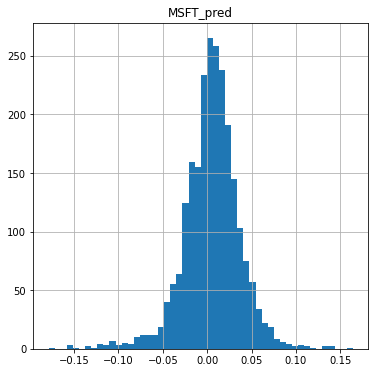

In [7]:
# MSFT Future Returns

df[[stg.MSFT_PRED]].hist(bins=50, figsize=(6,6))
plt.show()

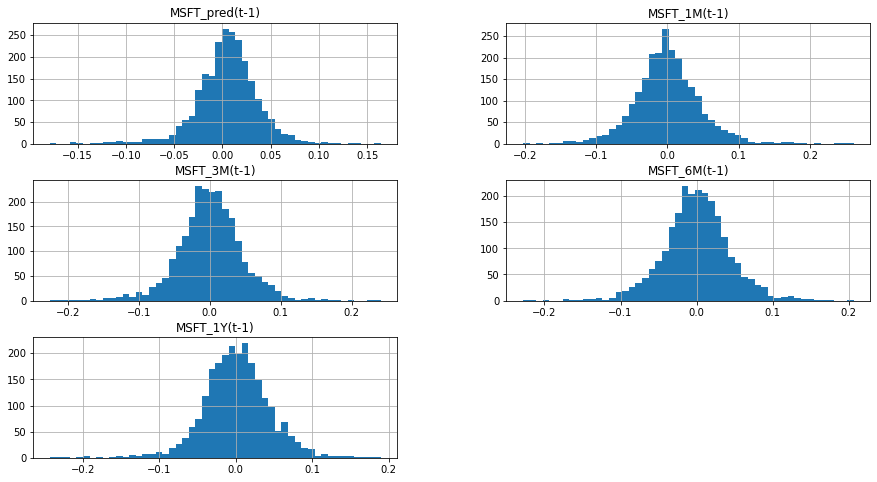

In [8]:
# AMZN 5 Business Day Returns, 15 Business Day Returns, 30 Business Day Returns, 60 Business Day Returns

df[[stg.MSFT_lagged ,stg.MSFT_1M_lagged, stg.MSFT_3M_lagged, stg.MSFT_6M_lagged, stg.MSFT_1Y_lagged]].hist(bins=50, figsize=(15,8))
plt.show()


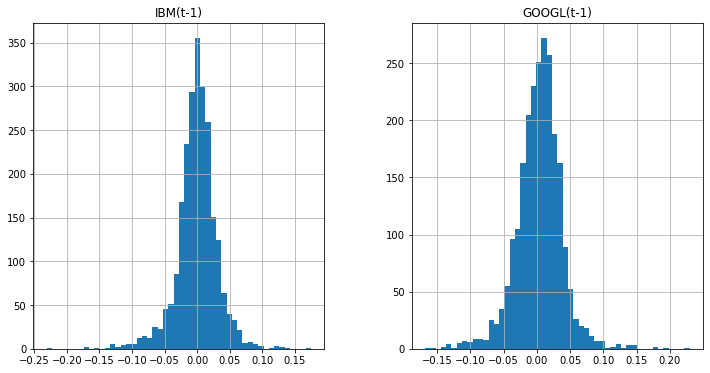

In [14]:
# GOOGLE 5 Business Day Returns, IBM 5 Business DayReturns

df[[stg.IBM_lagged, stg.GOOGL_lagged]].hist(bins=50, figsize=(12,6))
plt.show()

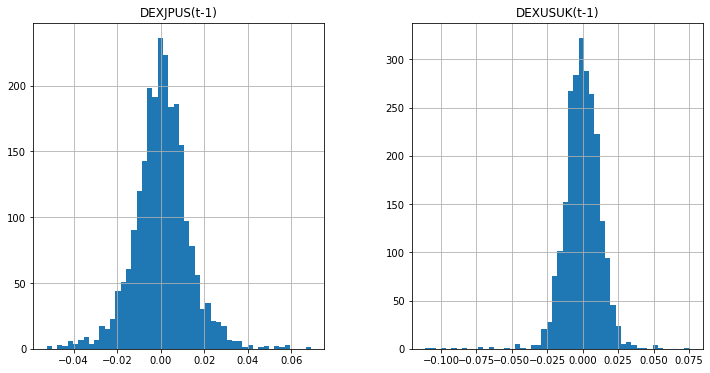

In [15]:
# USD/JPY 5 Business DayReturns, GBP/USD 5 Business DayReturns

df[[stg.DEXJPUS_lagged, stg.DEXUSUK_lagged]].hist(bins=50, figsize=(12,6))
plt.show()


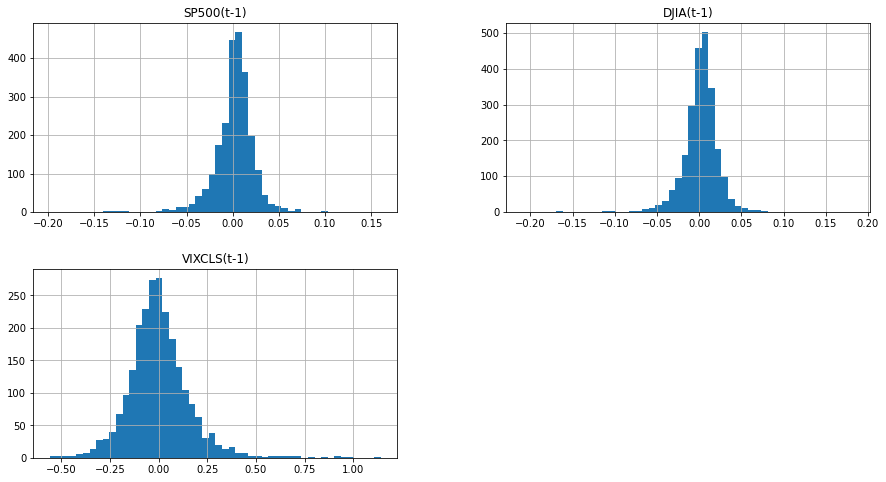

In [16]:
# S&P 500 5 Business DayReturns, Dow Jones 5 Business DayReturns, VIXCLS 5 Business DayReturns

df[[stg.SP500_lagged, stg.DJIA_lagged, stg.VIXCLS_lagged]].hist(bins=50, figsize=(15,8))
plt.show()


#### 4.2 Density

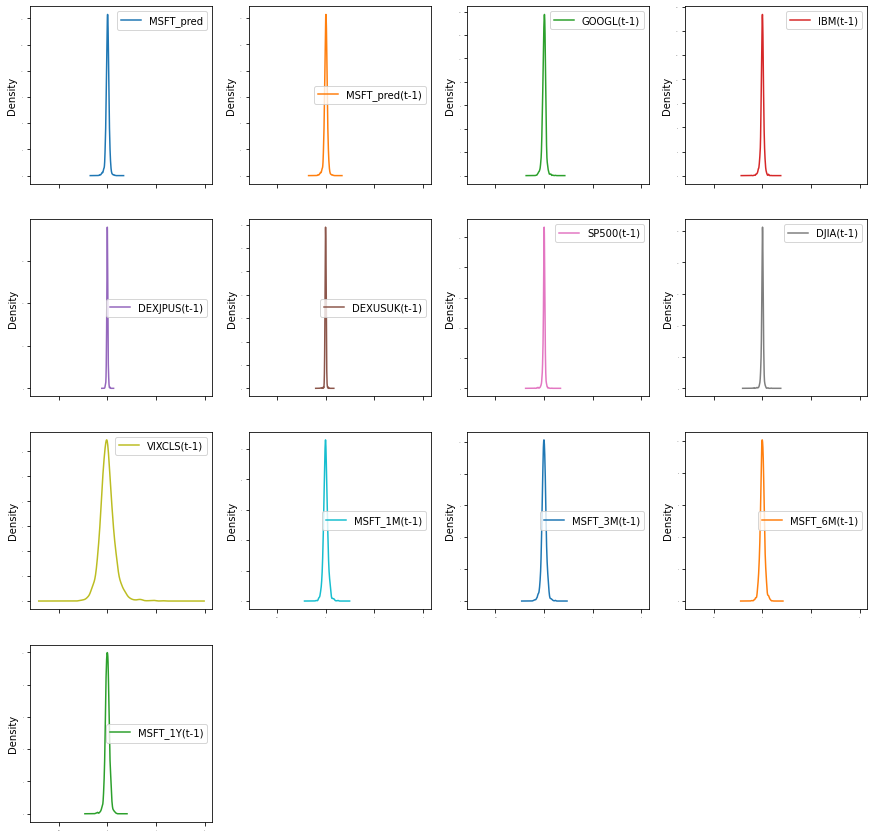

In [17]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
plt.show()

#### 4.3 Correlation Matrix

<AxesSubplot:title={'center':'Correlation Matrix'}>

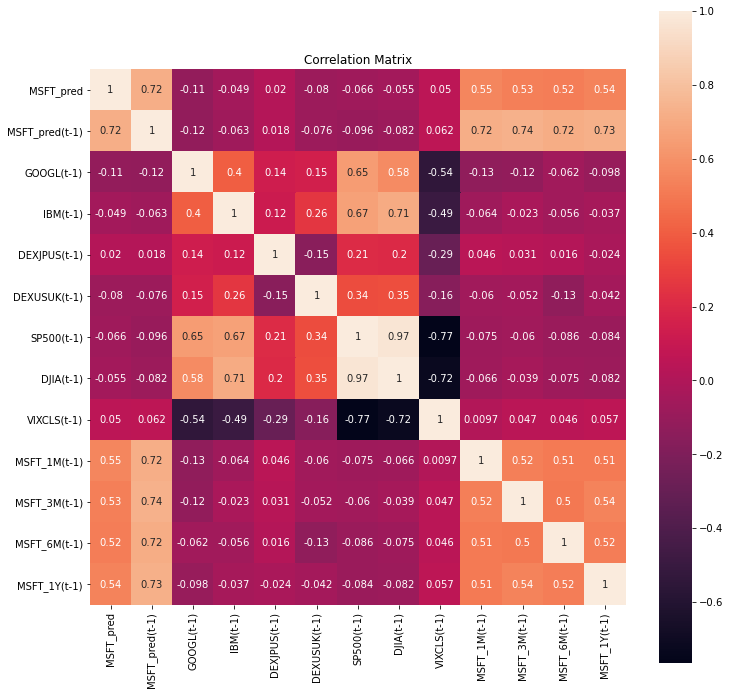

In [18]:
correlation = df.corr()
plt.figure(figsize=(12,12))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True)

#### 4.4 Scatter Matrices

<Figure size 504x504 with 0 Axes>

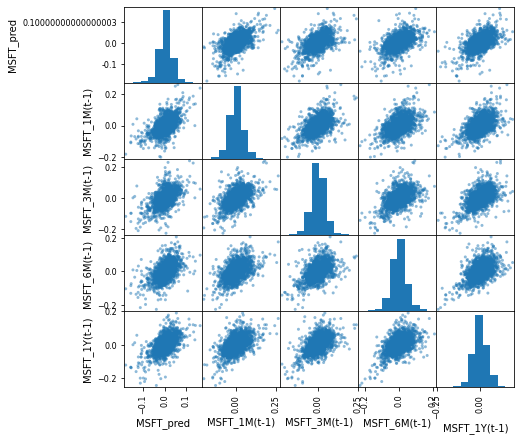

In [19]:
plt.figure(figsize=(7,7))
scatter_matrix(df[[stg.MSFT_PRED, stg.MSFT_1M_lagged, stg.MSFT_3M_lagged, stg.MSFT_6M_lagged, stg.MSFT_1Y_lagged]],figsize=(7,7))
plt.show()

<Figure size 504x504 with 0 Axes>

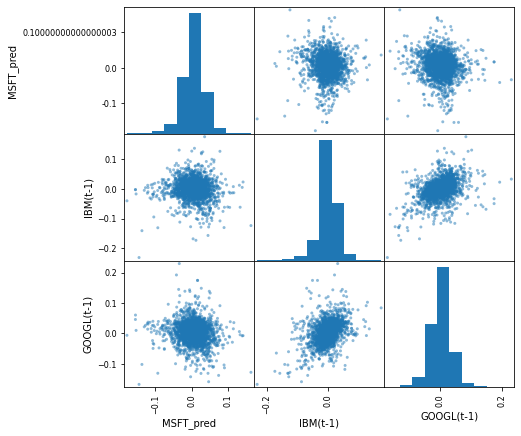

In [20]:
plt.figure(figsize=(7,7))
scatter_matrix(df[[stg.MSFT_PRED, stg.IBM_lagged, stg.GOOGL_lagged]],figsize=(7,7))
plt.show()

<Figure size 504x504 with 0 Axes>

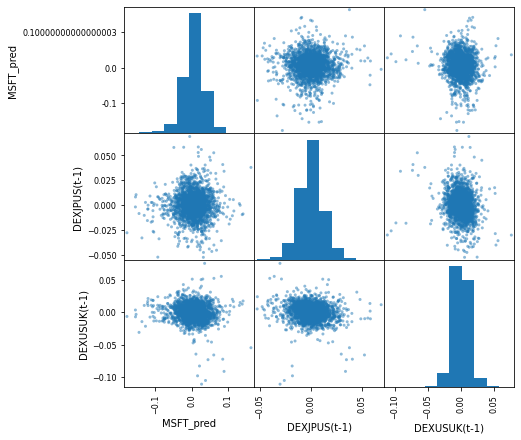

In [22]:
plt.figure(figsize=(7,7))
scatter_matrix(df[[stg.MSFT_PRED, stg.DEXJPUS_lagged, stg.DEXUSUK_lagged]],figsize=(7,7))
plt.show()

<Figure size 504x504 with 0 Axes>

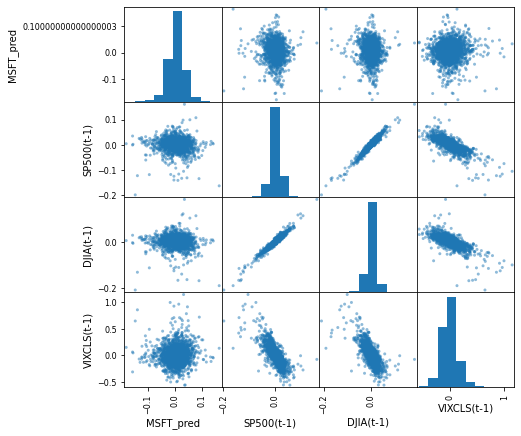

In [23]:
plt.figure(figsize=(7,7))
scatter_matrix(df[[stg.MSFT_PRED, stg.SP500_lagged, stg.DJIA_lagged, stg.VIXCLS_lagged]],figsize=(7,7), cmap="red")
plt.show()

## 5. **Time Series Analysis**

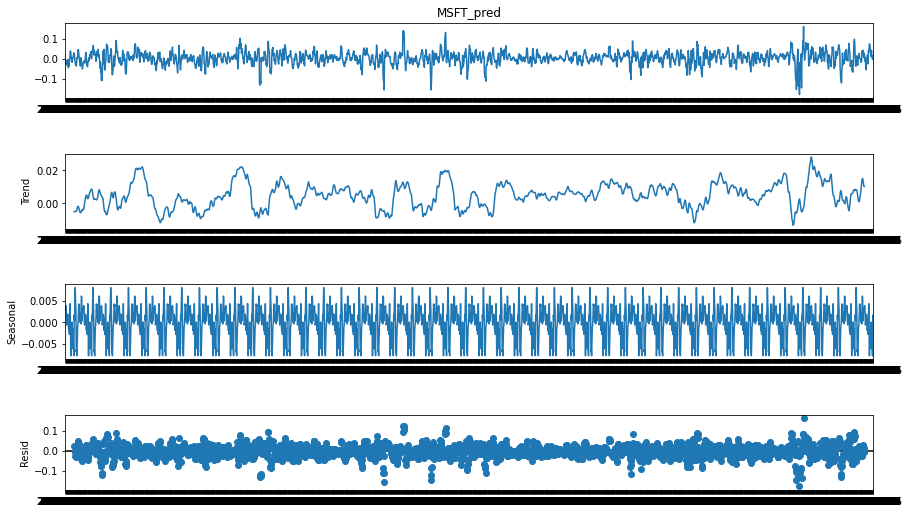

In [24]:
res = sm.tsa.seasonal_decompose(Y, period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()